Import Library

In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


Load Data

In [2]:
# load the dataset
x = pd.read_csv('data_cleaned_avg.csv')
# split into input (X) and output (y) variables
y = x.pop('O3')
y.head()

0     0.004714
1     0.017188
2     0.015556
3     0.010833
4     0.012143
        ...   
95    0.025625
96    0.023391
97    0.021542
98    0.033333
99    0.040476
Name: O3, Length: 100, dtype: float64

In [3]:
y.describe()

count    26564.000000
mean         0.023936
std          0.012080
min          0.002000
25%          0.014417
50%          0.023051
75%          0.032333
max          0.075091
Name: O3, dtype: float64

Split dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling dataset

In [4]:
X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Pembuatan model neural network

W0420 13:14:17.870893  3996 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0420 13:14:17.891839  3996 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0420 13:14:17.895828  3996 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0420 13:14:17.958660  3996 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.comp

Epoch 00117: early stopping


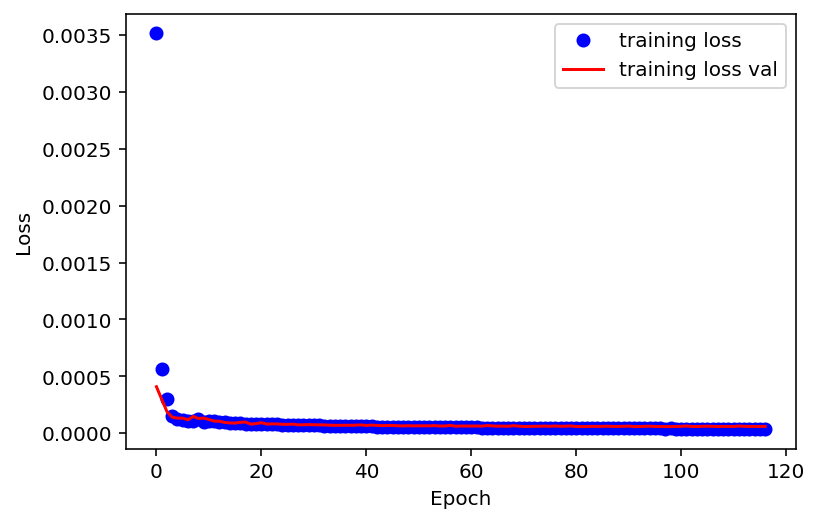

In [5]:
model = Sequential()
model.add(Dense(50, input_shape=(31,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer="adam", loss='mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, callbacks=[earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Perhitungan Score dan Error

In [6]:
y_train_pred = model.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("RMS: ",rmse_train)
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))
print("RMS: ",rmse_test)

The R2 score on the Train set is:	0.710
RMS:  0.0065030500077823145
The R2 score on the Test set is:	0.561
RMS:  0.008003418911704727


Plot data

<Figure size 432x288 with 0 Axes>

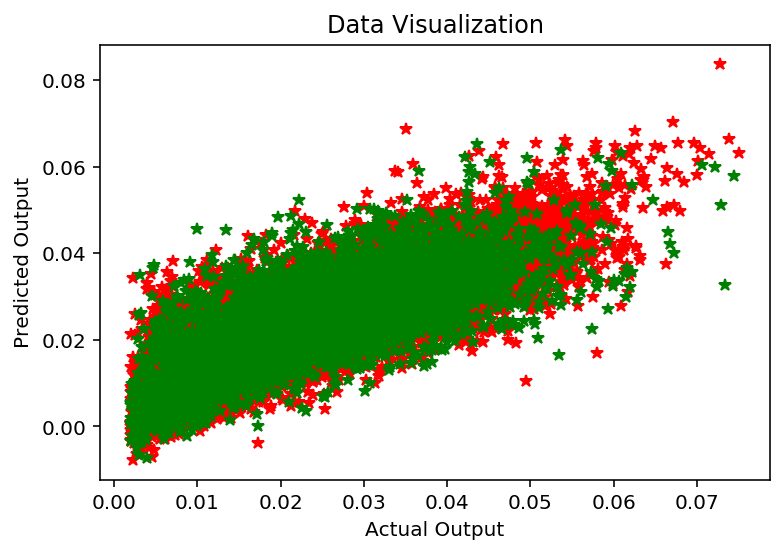

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Data Visualization')
plt.figure()